<a href="https://colab.research.google.com/github/evitts1989/evitts1989.github.io/blob/master/Corey_Evitts_DS_BUILD_1FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#What are the top 7 Crimes in two of the largest cities in the US.
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
#I used Chicago and Los Angeles public data to answer this question
chicago = pd.read_csv('https://data.cityofchicago.org/api/views/w98m-zvie/rows.csv?accessType=DOWNLOAD')

In [49]:
#Starting to clean and explore the data provided
print(chicago.shape)
chicago.head()

(258622, 22)


,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11996326,JD170429,09/01/2019 09:00:00 AM,055XX N MAPLEWOOD AVE,0265,CRIM SEXUAL ASSAULT,AGGRAVATED: OTHER,NURSING HOME/RETIREMENT HOME,False,False,2011,20,40.0,4.0,02,1158334.0,1936781.0,2019,03/04/2020 03:48:36 PM,41.982273,-87.693057,"(41.98227342, -87.693056814)"
1,11994248,JD166599,12/05/2019 01:00:00 PM,016XX N FAIRFIELD AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,False,1421,14,1.0,24.0,08B,1157784.0,1910840.0,2019,03/04/2020 03:48:36 PM,41.911101,-87.695789,"(41.911100934, -87.695789216)"
2,11998846,JD173154,12/05/2019 08:00:00 AM,075XX S ESSEX AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,421,4,7.0,43.0,08B,NaN,NaN,2019,03/04/2020 03:50:43 PM,NaN,NaN,NaN
3,11998280,JD172549,07/01/2019 12:00:00 AM,002XX E 32ND ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,211,2,3.0,35.0,11,NaN,NaN,2019,03/04/2020 03:50:43 PM,NaN,NaN,NaN
4,11992342,JC154085,02/15/2019 07:19:48 PM,079XX S ASHLAND AVE,1822,NARCOTICS,MANU/DEL:CANNABIS OVER 10 GMS,APARTMENT,True,False,611,6,21.0,71.0,18,1167055.0,1851989.0,2019,03/04/2020 03:48:36 PM,41.749414,-87.663417,"(41.749413676, -87.66341677)"


In [50]:
#Removing uneccessary collumns
chicago_df_crime = chicago[['Description']]
chicago_df_crime = pd.DataFrame(chicago_df_crime['Description'].value_counts())
chicago_df_crime['Crimes'] = chicago_df_crime.index
# chicago_df_crime = chicago_df1.rename(columns={"Primary Type": "Crime Count"}, errors="raise")

chicago_df_crime

,Description,Crimes
SIMPLE,30469,SIMPLE
DOMESTIC BATTERY SIMPLE,23578,DOMESTIC BATTERY SIMPLE
$500 AND UNDER,23122,$500 AND UNDER
OVER $500,14622,OVER $500
TO VEHICLE,12895,TO VEHICLE
...,...,...
"THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN",1,"THEFT/RECOVERY: CYCLE, SCOOTER, BIKE NO VIN"
PATRONIZING A PROSTITUTE,1,PATRONIZING A PROSTITUTE
UNLAWFUL USE OF BODY ARMOR,1,UNLAWFUL USE OF BODY ARMOR
FORCIBLE DETENTION,1,FORCIBLE DETENTION


In [51]:
chicago_df = chicago[['Primary Type']]
chicago_df

,Primary Type
0,CRIM SEXUAL ASSAULT
1,BATTERY
2,BATTERY
3,DECEPTIVE PRACTICE
4,NARCOTICS
...,...
258617,HOMICIDE
258618,HOMICIDE
258619,HOMICIDE
258620,HOMICIDE


In [52]:
chicago_df.dtypes

Primary Type    object
dtype: object

In [0]:
#checkin what type of the crime has highest numbers in ascending order
chicago_df1 = pd.DataFrame(chicago_df['Primary Type'].value_counts())


In [54]:
chicago_df1

,Primary Type
THEFT,62326
BATTERY,49466
CRIMINAL DAMAGE,26655
ASSAULT,20600
DECEPTIVE PRACTICE,18065
OTHER OFFENSE,16653
NARCOTICS,14102
BURGLARY,9623
MOTOR VEHICLE THEFT,8976
ROBBERY,7988


In [0]:
chicago_df1['Crimes'] = chicago_df1.index
chicago_df1 = chicago_df1.rename(columns={"Primary Type": "Crime Count"}, errors="raise")

In [56]:
chicago_df1

,Crime Count,Crimes
THEFT,62326,THEFT
BATTERY,49466,BATTERY
CRIMINAL DAMAGE,26655,CRIMINAL DAMAGE
ASSAULT,20600,ASSAULT
DECEPTIVE PRACTICE,18065,DECEPTIVE PRACTICE
OTHER OFFENSE,16653,OTHER OFFENSE
NARCOTICS,14102,NARCOTICS
BURGLARY,9623,BURGLARY
MOTOR VEHICLE THEFT,8976,MOTOR VEHICLE THEFT
ROBBERY,7988,ROBBERY


In [57]:
chicago_df1.head(5)

,Crime Count,Crimes
THEFT,62326,THEFT
BATTERY,49466,BATTERY
CRIMINAL DAMAGE,26655,CRIMINAL DAMAGE
ASSAULT,20600,ASSAULT
DECEPTIVE PRACTICE,18065,DECEPTIVE PRACTICE


In [0]:
#Creating Dataframe based on relevant stats
chicago_final = pd.DataFrame(chicago_df1.loc[chicago_df1['Crimes'].isin(['THEFT','BATTERY', 'CRIMINAL DAMAGE', 'ASSAULT',
                                                  'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'NARCOTICS'])])

In [59]:
chicago_final

,Crime Count,Crimes
THEFT,62326,THEFT
BATTERY,49466,BATTERY
CRIMINAL DAMAGE,26655,CRIMINAL DAMAGE
ASSAULT,20600,ASSAULT
DECEPTIVE PRACTICE,18065,DECEPTIVE PRACTICE
OTHER OFFENSE,16653,OTHER OFFENSE
NARCOTICS,14102,NARCOTICS


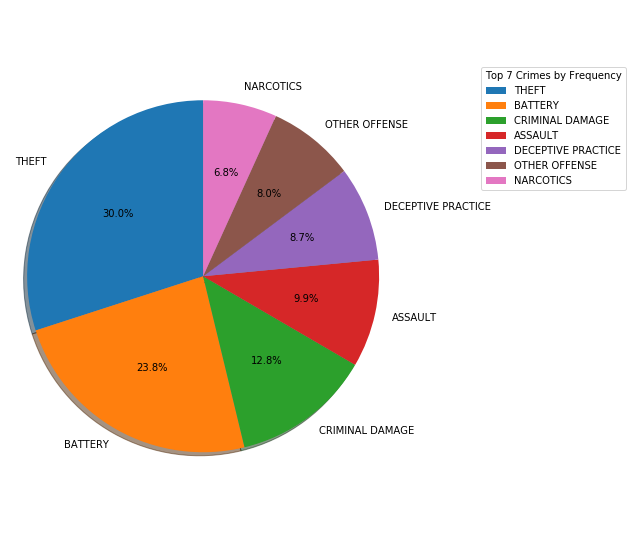

In [60]:
#Created a pie chart visualizing the top 7 crimes in city by percentage
labels = chicago_final['Crimes']
sizes = chicago_final['Crime Count']

fig1, ax1 = plt.subplots(figsize=(7, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.legend(title="Top 7 Crimes by Frequency", bbox_to_anchor=(1.2,0.9), loc="upper left")

plt.show()

In [0]:
#Loading crime stats from LA and cleaning
 other = pd.read_csv('https://data.lacity.org/api/views/63jg-8b9z/rows.csv?accessType=DOWNLOAD', error_bad_lines=True)

In [62]:
list(other)


['DR_NO',
 'Date Rptd',
 'DATE OCC',
 'TIME OCC',
 'AREA ',
 'AREA NAME',
 'Rpt Dist No',
 'Part 1-2',
 'Crm Cd',
 'Crm Cd Desc',
 'Mocodes',
 'Vict Age',
 'Vict Sex',
 'Vict Descent',
 'Premis Cd',
 'Premis Desc',
 'Weapon Used Cd',
 'Weapon Desc',
 'Status',
 'Status Desc',
 'Crm Cd 1',
 'Crm Cd 2',
 'Crm Cd 3',
 'Crm Cd 4',
 'LOCATION',
 'Cross Street',
 'LAT',
 'LON']

In [0]:
LA_Crime = other[['Crm Cd Desc']]

In [0]:
LA_Crime1 = pd.DataFrame(LA_Crime['Crm Cd Desc'].value_counts())

In [65]:
LA_Crime1

,Crm Cd Desc
BATTERY - SIMPLE ASSAULT,190539
BURGLARY FROM VEHICLE,162140
VEHICLE - STOLEN,159832
THEFT PLAIN - PETTY ($950 & UNDER),149772
BURGLARY,147578
...,...
BLOCKING DOOR INDUCTION CENTER,3
TRAIN WRECKING,2
FIREARMS RESTRAINING ORDER (FIREARMS RO),2
DRUNK ROLL - ATTEMPT,1


In [0]:
LA_Crime1['Crimes'] = LA_Crime1.index
LA_Crime1 = LA_Crime1.rename(columns={"Crm Cd Desc": "Crime Count"}, errors="raise")

In [67]:
LA_Crime1.head(7)

,Crime Count,Crimes
BATTERY - SIMPLE ASSAULT,190539,BATTERY - SIMPLE ASSAULT
BURGLARY FROM VEHICLE,162140,BURGLARY FROM VEHICLE
VEHICLE - STOLEN,159832,VEHICLE - STOLEN
THEFT PLAIN - PETTY ($950 & UNDER),149772,THEFT PLAIN - PETTY ($950 & UNDER)
BURGLARY,147578,BURGLARY
THEFT OF IDENTITY,126547,THEFT OF IDENTITY
INTIMATE PARTNER - SIMPLE ASSAULT,114509,INTIMATE PARTNER - SIMPLE ASSAULT


In [0]:
LA_Crime1 = pd.DataFrame(LA_Crime1.loc[LA_Crime1['Crimes'].isin(['BATTERY - SIMPLE ASSAULT','BURGLARY FROM VEHICLE', 'VEHICLE - STOLEN', 'THEFT PLAIN - PETTY ($950 & UNDER)',
                                                  'BURGLARY', 'THEFT OF IDENTITY', 'INTIMATE PARTNER - SIMPLE ASSAULT'])])

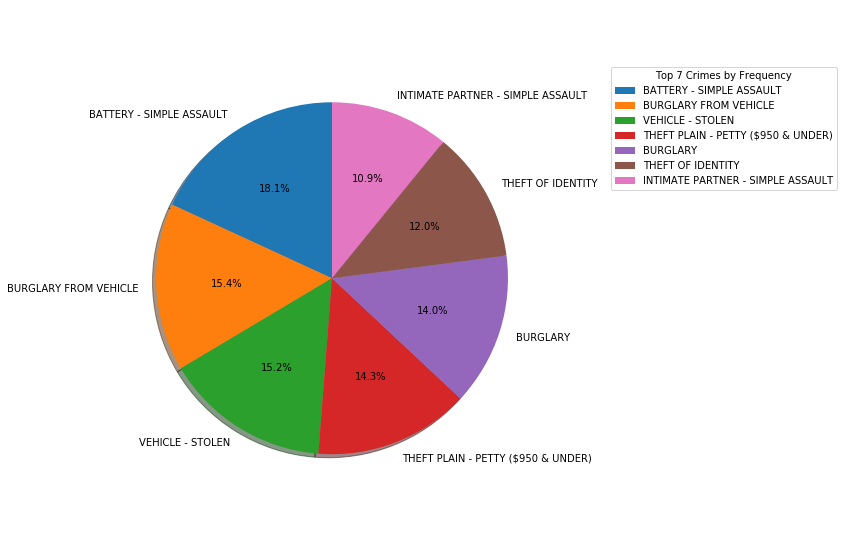

In [69]:
#Created a pie chart to visualize top 7 crimes by percentage 
labels = LA_Crime1['Crimes']
sizes = LA_Crime1['Crime Count']

fig1, ax1 = plt.subplots(figsize=(7, 10))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.legend(title="Top 7 Crimes by Frequency", bbox_to_anchor=(1.2,0.9), loc="upper left")

plt.show()